<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center>
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center>
    <font size="4">Computer Vision 1 University of Amsterdam</font>
</center>
<center>
    <font size="4">Due 23:59PM, 24th October, 2025 (Amsterdam time)</font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID: 14633485 \
Student1 Name: David van Batenburg

Student2 ID: 16195965\
Student2 Name: Samuele Punzo

Student3 ID: 16334523 \
Student3 Name: Edoardo Vergnano

Student4 ID: 16217632 \
Student4 Name: Seyedeh Zahra Ahmadi

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification.

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves).

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import plotly.express as px
import textwrap
from tqdm.auto import tqdm
import os
import optuna
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE


from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, Subset, random_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Using cpu device


100%|██████████| 169001437/169001437 [00:15<00:00, 10784166.48it/s]


Extracting ./data\cifar-100-python.tar.gz to ./data
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


In [3]:
if not os.path.exists("images"):
    os.mkdir("images")

if not os.path.exists('Results'):
    os.makedirs('Results')

<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

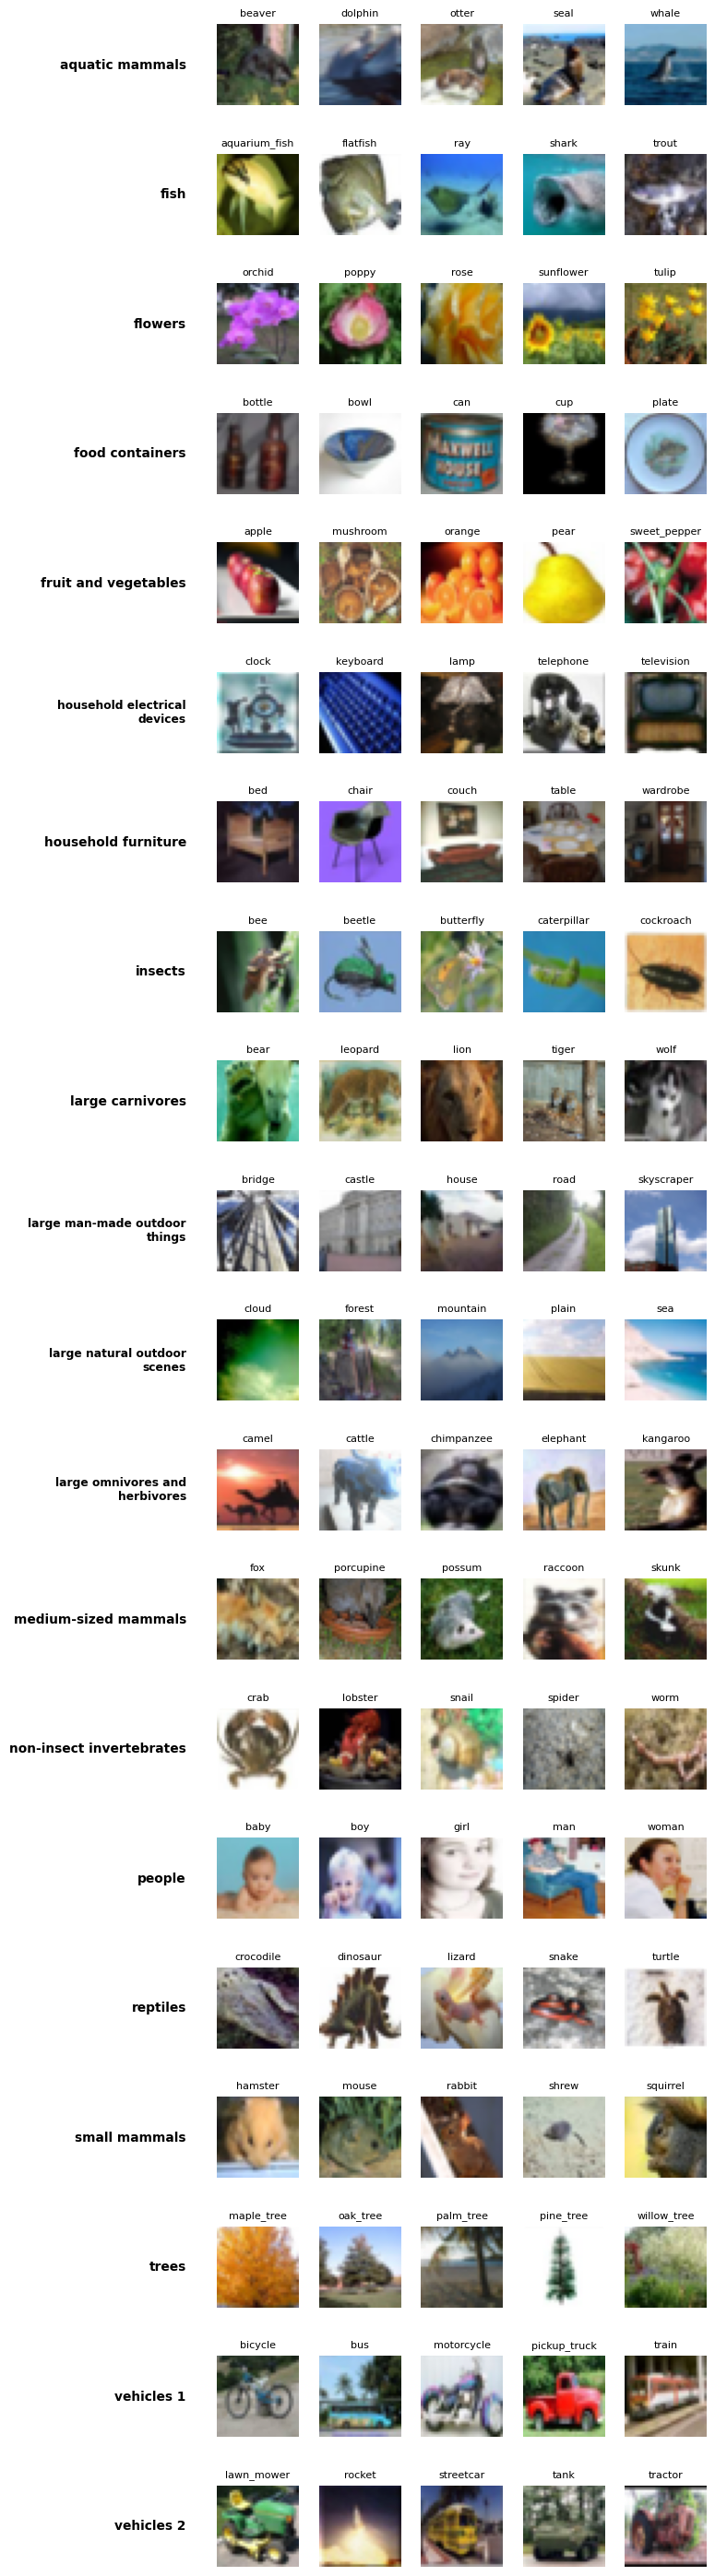

In [44]:
def visualize_superclasses(dataset, superclass_to_indices, classes, samples_per_subclass=1, save_path=None):
    """
    Visualize CIFAR-100 superclasses and subclasses.

    Args:
        dataset: torchvision CIFAR100 train_set (with .data and .targets)
        superclass_to_indices: mapping sup_name -> list of class indices
        classes: sequence (list/tuple) where classes[idx] -> class name (required)
        class_to_idx: mapping class_name -> idx (required)
        samples_per_subclass: number of images per subclass to show
        save_path: optional path to save the figure
    """

    samples_per_subclass = max(1, samples_per_subclass)
    n_super = len(superclass_to_indices)

    n_sub = 5  # CIFAR-100 grouping
    cols = n_sub * samples_per_subclass

    # keep previous figsize logic (unchanged)
    fig_h = max(1.5, n_super * 1.5)
    fig_w = max(1.5, cols * 1.5)

    fig, axes = plt.subplots(n_super, cols, figsize=(fig_w, fig_h))

    # ensure consistent 2D axes indexing
    if n_super == 1:
        axes = axes[np.newaxis, :]

    data = dataset.data  # uint8 (N, H, W, C)
    targets = np.array(dataset.targets)

    wrap_width = 24

    for r, (sup_name, indices) in enumerate(superclass_to_indices.items()):
        for c, cls_idx in enumerate(indices):
            subclass = classes[cls_idx]
            idxs = np.where(targets == cls_idx)[0]

            if len(idxs) == 0:
                for s in range(samples_per_subclass):
                    ax = axes[r, c * samples_per_subclass + s]
                    ax.axis('off')
                continue

            chosen = np.random.choice(idxs, size=samples_per_subclass, replace=len(idxs) < samples_per_subclass)

            for s, idx in enumerate(chosen):
                ax = axes[r, c * samples_per_subclass + s]
                img = data[idx]  # H,W,C uint8
                ax.imshow(img)
                ax.axis('off')
                ax.set_title(f"{subclass}", fontsize=8)

        # wrap superclass name
        wrapped = textwrap.fill(sup_name, width=wrap_width)
        fontsize = 8 if '\n' in wrapped or len(sup_name) > wrap_width else 9

        left_ax = axes[r, 0]

        left_ax.text(-0.38, 0.5, wrapped, va='center', ha='right', transform=left_ax.transAxes, fontsize=fontsize*1.1, fontweight='bold')

    plt.tight_layout(rect=[0.15, 0.03, 1.2, 0.97])
    plt.subplots_adjust(wspace=0.25, hspace=0.35)

    if save_path:
        plt.savefig(save_path, dpi=200, bbox_inches='tight')
    plt.show()


def visualize_treemap(train_set):
    """
    Visualize CIFAR-100 superclasses and subclasses as a treemap.

    Args:
        train_set: torchvision CIFAR100 train_set (with .data and .targets)
    """
    targets = np.array(train_set.targets)  # or dataset.targets
    rows = []
    for sup, idxs in superclass_to_indices.items():
        for cls_idx in idxs:
            cls_name = classes[cls_idx]
            count = int((targets == cls_idx).sum())
            rows.append({'superclass': sup, 'class': cls_name, 'count': count})
    df = pd.DataFrame(rows)

    fig = px.treemap(df, path=['superclass','class'], values='count',
                    color='superclass', title='CIFAR-100 superclasses / classes')
    fig.update_layout(margin=dict(t=40,l=10,r=10,b=10))
    fig.show()


# Example: one sample per subclass, saved for appendix
visualize_treemap(train_set)
visualize_superclasses(train_set, superclass_to_indices, classes, samples_per_subclass=1, save_path="images/cifar100_superclasses.png")

<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes.

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [45]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Second fully connected layer

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        x = torch.flatten(x, 1)  # Flatten the input tensor starting from dimension 1 (to preserve batch size)
        x = F.relu(self.fc1(x))    # Apply ReLU activation after the first
        x = self.fc2(x)            # Second layer (output layer)

        return x

<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [46]:
class ConvNet(nn.Module):

    def __init__(self, num_classes=100):
        '''
        Initializes the convolutional neural network model.

        Args:
            None
        '''

        super(ConvNet, self).__init__()

        self.conv_blocks = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(16, 120, kernel_size=5),
            nn.Tanh(),
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=120, out_features=84), #Number of trainable parameters: 10164 (#inputs (120) * #outputs (84) + #biases (84)), add in report
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=num_classes),
        )

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        x = self.conv_blocks(x)        # -> (batch, 120, 1, 1) for 32x32 input
        x = self.fc_layers(x)          # Flatten is inside fc_layers

        return x


<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [47]:
class CIFAR100_loader(Dataset):

    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''

        self.train = train
        self.transform = transform

        self.dataset = torchvision.datasets.CIFAR100(root=root, train=train, transform=transform, download=download)

        self.data = self.dataset.data
        self.labels = self.dataset.targets

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        return len(self.data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        img, label = self.data[idx], self.labels[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

In [48]:
def create_transforms():
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''
    # Using CIFAR-100 mean and std from https://gist.github.com/weiaicunzai/e623931921efefd4c331622c344d8151
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761])
    ])
    return transform


In [49]:
def create_optimizer(model, learning_rate=0.001, weight_decay=0.0):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    return optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [50]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [51]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [52]:
def train(net, train_loader, criterion, optimizer, epochs=100):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        tuple: A tuple containing lists of training loss and training accuracy per epoch.
    '''

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)

    train_losses = []
    train_accuracies = []

    for epoch in range(epochs):
        net.train()
        running_loss  = 0.0
        correct, total = 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct / total
        print(f'Epoch [{epoch + 1}/{epochs}] | Loss: {avg_loss:.4f} | Training Accuracy: {train_accuracy:.2f}%')

        train_losses.append(avg_loss)
        train_accuracies.append(train_accuracy)

    return train_losses, train_accuracies

First, initialize the datasets and data loaders for both models.

In [53]:
Transform= create_transforms()

train_dataset = CIFAR100_loader(root='./data', train=True, transform=Transform, download=True)
test_dataset = CIFAR100_loader(root='./data', train=False, transform=Transform, download=True)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

Number of training samples: 50000
Number of test samples: 10000


Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [ ]:
#-----------------------DO NOT RUN UNLESS YOU WANT TRO RETRAIN THE MODEL------------------------

if not os.path.exists('Results/Basic2LNN'):
    os.makedirs('Results/Basic2LNN')

input_size = 3 * 32 * 32  # CIFAR-100 images are 32x32 with 3 color channels
hidden_size = 512
num_classes = 100

two_layer_model = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = create_optimizer(two_layer_model, learning_rate=0.001)

epochs = 50

losses, accuracies = train(
    net=two_layer_model,
    train_loader=train_loader,
    criterion=criterion,
    optimizer=optimizer,
    epochs=epochs,
)

joblib.dump(losses, 'Results/Basic2LNN/losses.joblib')
joblib.dump(accuracies, 'Results/Basic2LNN/accuracies.joblib')
torch.save(two_layer_model.state_dict(), 'Results/Basic2LNN/model_weights.pth')

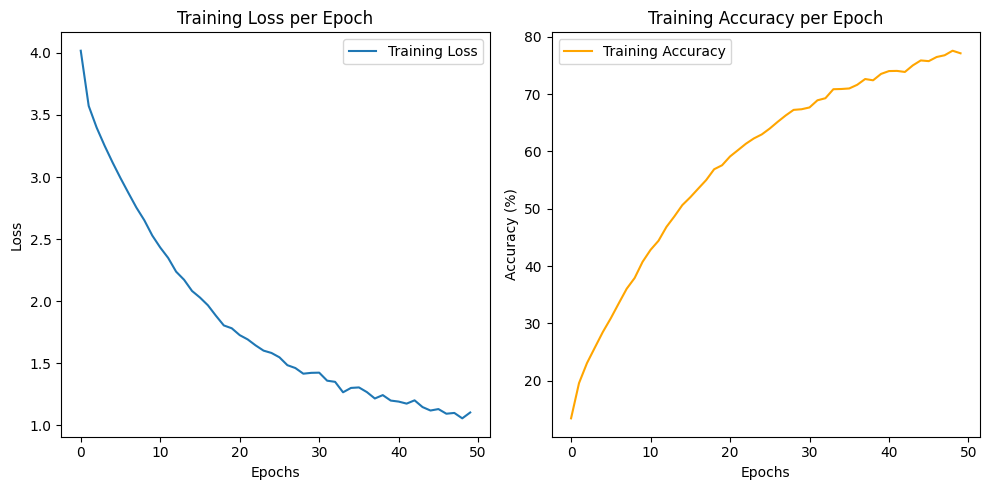

In [56]:
epochs = 50

losses = joblib.load('Results/Basic2LNN/losses.joblib')
accuracies = joblib.load('Results/Basic2LNN/accuracies.joblib')


# Plotting the training loss and accuracy
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracies, label='Training Accuracy', color="orange")
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [57]:
accuracies = joblib.load('Results/Basic2LNN/accuracies.joblib')
losses = joblib.load('Results/Basic2LNN/losses.joblib')

input_size = 3 * 32 * 32
hidden_size = 512
num_classes = 100

two_layer_model = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
two_layer_model.load_state_dict(torch.load('Results/Basic2LNN/model_weights.pth', map_location=device))
two_layer_model.to(device)
two_layer_model.eval()

test_accuracy = validate(two_layer_model, test_loader)

classes = train_dataset.dataset.classes
validate_per_class(two_layer_model, test_loader, classes)

Accuracy of the network on the test images: 20.46 %
Accuracy of apple : 51.00 %
Accuracy of aquarium_fish : 23.00 %
Accuracy of baby  : 13.00 %
Accuracy of bear  : 15.00 %
Accuracy of beaver : 18.00 %
Accuracy of bed   : 11.00 %
Accuracy of bee   : 9.00 %
Accuracy of beetle : 12.00 %
Accuracy of bicycle : 21.00 %
Accuracy of bottle : 36.00 %
Accuracy of bowl  : 14.00 %
Accuracy of boy   : 28.00 %
Accuracy of bridge : 23.00 %
Accuracy of bus   : 13.00 %
Accuracy of butterfly : 16.00 %
Accuracy of camel : 9.00 %
Accuracy of can   : 19.00 %
Accuracy of castle : 30.00 %
Accuracy of caterpillar : 9.00 %
Accuracy of cattle : 6.00 %
Accuracy of chair : 32.00 %
Accuracy of chimpanzee : 21.00 %
Accuracy of clock : 20.00 %
Accuracy of cloud : 51.00 %
Accuracy of cockroach : 50.00 %
Accuracy of couch : 12.00 %
Accuracy of crab  : 10.00 %
Accuracy of crocodile : 12.00 %
Accuracy of cup   : 45.00 %
Accuracy of dinosaur : 17.00 %
Accuracy of dolphin : 20.00 %
Accuracy of elephant : 12.00 %
Accuracy 

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [ ]:
#-----------------------DO NOT RUN------------------------

if not os.path.exists('Results/BasicConvNet'):
    os.makedirs('Results/BasicConvNet')

conv_model = ConvNet(num_classes=100)

criterion = nn.CrossEntropyLoss()
optimizer = create_optimizer(conv_model, learning_rate=0.001)

epochs = 50

losses, accuracies = train(
    net=conv_model,
    train_loader=train_loader,
    criterion=criterion,
    optimizer=optimizer,
    epochs=epochs,
)

joblib.dump(losses, 'Results/BasicConvNet/losses.joblib')
joblib.dump(accuracies, 'Results/BasicConvNet/accuracies.joblib')
torch.save(conv_model.state_dict(), 'Results/BasicConvNet/model_weights.pth')

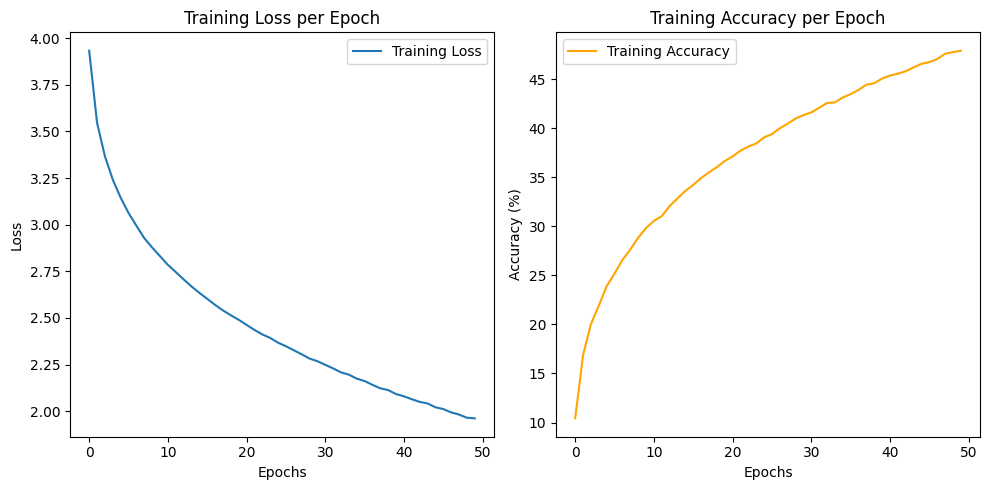

In [59]:
epochs = 50

convNet_losses = joblib.load('Results/BasicConvNet/losses.joblib')
convNet_accuracies = joblib.load('Results/BasicConvNet/accuracies.joblib')


# Plotting the training loss and accuracy
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, convNet_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, convNet_accuracies, label='Training Accuracy', color="orange")
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
losses = joblib.load('Results/BasicConvNet/losses.joblib')
accuracies = joblib.load('Results/BasicConvNet/accuracies.joblib')

conv_model = ConvNet(num_classes=100)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
conv_model.load_state_dict(torch.load('Results/BasicConvNet/model_weights.pth', map_location=device))
conv_model.to(device)
conv_model.eval()

test_accuracy = validate(conv_model, test_loader)

classes = train_dataset.dataset.classes
validate_per_class(conv_model, test_loader, classes)

Accuracy of the network on the test images: 22.96 %
Accuracy of apple : 48.00 %
Accuracy of aquarium_fish : 30.00 %
Accuracy of baby  : 16.00 %
Accuracy of bear  : 6.00 %
Accuracy of beaver : 12.00 %
Accuracy of bed   : 18.00 %
Accuracy of bee   : 23.00 %
Accuracy of beetle : 31.00 %
Accuracy of bicycle : 26.00 %
Accuracy of bottle : 33.00 %
Accuracy of bowl  : 6.00 %
Accuracy of boy   : 11.00 %
Accuracy of bridge : 24.00 %
Accuracy of bus   : 19.00 %
Accuracy of butterfly : 15.00 %
Accuracy of camel : 14.00 %
Accuracy of can   : 16.00 %
Accuracy of castle : 36.00 %
Accuracy of caterpillar : 13.00 %
Accuracy of cattle : 13.00 %
Accuracy of chair : 35.00 %
Accuracy of chimpanzee : 42.00 %
Accuracy of clock : 16.00 %
Accuracy of cloud : 37.00 %
Accuracy of cockroach : 47.00 %
Accuracy of couch : 10.00 %
Accuracy of crab  : 14.00 %
Accuracy of crocodile : 12.00 %
Accuracy of cup   : 31.00 %
Accuracy of dinosaur : 20.00 %
Accuracy of dolphin : 47.00 %
Accuracy of elephant : 19.00 %
Accurac

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

In [61]:
# ============================================================================
# 1. Learning Curves for Best Trial
# ============================================================================
def plot_best_trial_learning_curves(study, path, val_attr="test_accuracies"):
    """Plot loss and accuracy curves for the best trial"""
    best_trial = study.best_trial

    epoch_losses = best_trial.user_attrs["epoch_losses"]
    train_accs = best_trial.user_attrs["train_accuracies"]
    test_accs = best_trial.user_attrs[val_attr]

    epochs = range(1, len(epoch_losses) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Loss curve
    ax1.plot(epochs, epoch_losses, 'b-', linewidth=2, label='Training Loss')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.set_title(f'Training Loss - Best Trial #{best_trial.number}', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Accuracy curves
    ax2.plot(epochs, train_accs, 'g-', linewidth=2, label='Train Accuracy')
    ax2.plot(epochs, test_accs, 'r-', linewidth=2, label='Validation Accuracy')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.set_title(f'Accuracy Curves - Best Trial #{best_trial.number}', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.savefig(path+'/best_trial_learning_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print final metrics
    print(f"Best Trial #{best_trial.number}")
    print(f"Final Train Accuracy: {train_accs[-1]:.4f}")
    print(f"Final Val Accuracy: {test_accs[-1]:.4f}")
    print(f"Best Val Accuracy: {max(test_accs):.4f}")
    print(f"Final Loss: {epoch_losses[-1]:.4f}")

# ============================================================================
# 2. Compare Multiple Trials
# ============================================================================
def plot_multiple_trials_comparison(study, path, val_attr="test_accuracies", n_trials=5):
    """Compare learning curves of top N trials"""
    # Get top trials
    sorted_trials = sorted(study.trials, key=lambda t: t.value if t.value is not None else -np.inf, reverse=True)
    top_trials = sorted_trials[:n_trials]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    for trial in top_trials:
        if val_attr not in trial.user_attrs:
            continue

        test_accs = trial.user_attrs[val_attr]
        epoch_losses = trial.user_attrs["epoch_losses"]
        epochs = range(1, len(test_accs) + 1)

        # Validation accuracy
        ax1.plot(epochs, test_accs, linewidth=2,
                label=f'Trial #{trial.number} (final: {test_accs[-1]:.3f})', alpha=0.7)

        # Loss
        ax2.plot(epochs, epoch_losses, linewidth=2,
                label=f'Trial #{trial.number} (final: {epoch_losses[-1]:.3f})', alpha=0.7)

    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Validation Accuracy', fontsize=12)
    ax1.set_title(f'Top {n_trials} Trials - Validation Accuracy', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=9)

    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.set_title(f'Top {n_trials} Trials - Training Loss', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=9)

    plt.tight_layout()
    plt.savefig(path+'/top_trials_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 3. Overfitting Analysis
# ============================================================================
def plot_overfitting_analysis(study, path, val_attr="test_accuracies"):
    """Analyze train-validation gap for best trial"""
    best_trial = study.best_trial

    train_accs = best_trial.user_attrs["train_accuracies"]
    test_accs = best_trial.user_attrs[val_attr]
    epochs = range(1, len(train_accs) + 1)

    gap = np.array(train_accs) - np.array(test_accs)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy comparison
    ax1.plot(epochs, train_accs, 'g-', linewidth=2, label='Train Accuracy')
    ax1.plot(epochs, test_accs, 'r-', linewidth=2, label='Validation Accuracy')
    ax1.fill_between(epochs, train_accs, test_accs, alpha=0.3, color='orange')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.set_title('Train vs Validation Accuracy', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Overfitting gap
    ax2.plot(epochs, gap, 'orange', linewidth=2)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.fill_between(epochs, 0, gap, alpha=0.3, color='orange')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Train - Validation Gap', fontsize=12)
    ax2.set_title('Overfitting Analysis', fontsize=14)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(path+'/overfitting_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Average Train-Val Gap: {np.mean(gap):.4f}")
    print(f"Final Train-Val Gap: {gap[-1]:.4f}")
    print(f"Max Train-Val Gap: {np.max(gap):.4f}")

# ============================================================================
# 4. All Trials Final Performance
# ============================================================================
def plot_all_trials_performance(study, path, val_attr="test_accuracies"):
    """Scatter plot of all trials' final performance"""
    trial_numbers = []
    final_train_accs = []
    final_val_accs = []
    final_losses = []

    for trial in study.trials:
        if trial.state != optuna.trial.TrialState.COMPLETE:
            continue
        if val_attr not in trial.user_attrs:
            continue

        trial_numbers.append(trial.number)
        final_train_accs.append(trial.user_attrs["train_accuracies"][-1])
        final_val_accs.append(trial.user_attrs[val_attr][-1])
        final_losses.append(trial.user_attrs["epoch_losses"][-1])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy scatter
    ax1.scatter(trial_numbers, final_train_accs, alpha=0.6, s=50, label='Train Acc', color='green')
    ax1.scatter(trial_numbers, final_val_accs, alpha=0.6, s=50, label='Val Acc', color='red')
    ax1.set_xlabel('Trial Number', fontsize=12)
    ax1.set_ylabel('Final Accuracy', fontsize=12)
    ax1.set_title('Final Accuracy Across All Trials', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Loss scatter
    ax2.scatter(trial_numbers, final_losses, alpha=0.6, s=50, color='blue')
    ax2.set_xlabel('Trial Number', fontsize=12)
    ax2.set_ylabel('Final Loss', fontsize=12)
    ax2.set_title('Final Loss Across All Trials', fontsize=14)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(path+'/all_trials_performance.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 5. Early Stopping Analysis
# ============================================================================
def plot_early_stopping_candidates(study, path, val_attr="test_accuracies"):
    """Identify which epoch would be best for early stopping"""
    best_trial = study.best_trial
    test_accs = best_trial.user_attrs[val_attr]
    epochs = range(1, len(test_accs) + 1)

    # Find best epoch
    best_epoch = np.argmax(test_accs) + 1
    best_acc = max(test_accs)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, test_accs, 'b-', linewidth=2, label='Validation Accuracy')
    plt.axvline(x=best_epoch, color='red', linestyle='--', linewidth=2,
                label=f'Best Epoch: {best_epoch} (acc={best_acc:.4f})')
    plt.scatter([best_epoch], [best_acc], color='red', s=200, zorder=5)

    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Validation Accuracy', fontsize=12)
    plt.title('Early Stopping Analysis - Best Trial', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(path+'/early_stopping_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Best epoch would be: {best_epoch}")
    print(f"Best validation accuracy: {best_acc:.4f}")
    print(f"Final validation accuracy: {test_accs[-1]:.4f}")
    print(f"Difference: {best_acc - test_accs[-1]:.4f}")

4 Fully connected layer network

In [62]:
class FourLayerNet(nn.Module):
    def __init__(self, input_size, num_classes=100):
        super(FourLayerNet, self).__init__()
        # Explicit layers with BatchNorm

        self.fc_layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_size, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),

        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),

        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),

        nn.Linear(128, num_classes))

    def forward(self, x):
        return self.fc_layers(x)

ConvNet

In [63]:
class newConvNet(nn.Module):
    def __init__(self, num_classes=100):
        super(newConvNet, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(6, 16, kernel_size=5),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Conv2d(32, 120, kernel_size=5),
            nn.ReLU(),
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(120, 84),
            nn.ReLU(),

            nn.Linear(84, 64),
            nn.ReLU(),

            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.fc_layers(self.conv_layers(x))

In [64]:
transform_train = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
])

transform_test = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
])

train_dataset = CIFAR100_loader(root='./data', train=True, transform=transform_train, download=True)
val_dataset = CIFAR100_loader(root='./data', train=True, transform=transform_test, download=True)
test_dataset = CIFAR100_loader(root='./data', train=False, transform=transform_test, download=True)

SEED = 42
total_train_len = len(train_dataset)
val_len = int(total_train_len * 0.20)
new_train_len = total_train_len - val_len

labels = train_dataset.labels
indices = list(range(len(labels)))

train_indices, val_indices = train_test_split(
    indices,
    test_size=val_len,
    stratify=labels,
    random_state=SEED
)

train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(val_dataset, val_indices)

batch_size = 64

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

print(f"Using {len(train_subset)} images for training (with augmentation)")
print(f"Using {len(val_subset)} images for validation (no augmentation)")
print(f"Using {len(test_dataset)} images for testing (no augmentation)")

Using 40000 images for training (with augmentation)
Using 10000 images for validation (no augmentation)
Using 10000 images for testing (no augmentation)


In [65]:
all_labels_np = np.array(train_dataset.labels)

# 2. Get the labels for just the validation and train subsets
val_subset_labels = all_labels_np[val_indices]
train_subset_labels = all_labels_np[train_indices]

# 3. Get the unique counts for each set
print("--- Original Dataset Distribution (CIFAR100) ---")
original_class, original_counts = np.unique(all_labels_np, return_counts=True)
print(f"Total classes: {len(original_class)}")
print(f"Samples per class: {original_counts[0]}") # Should be 500

print("\n--- Validation Subset Distribution ---")
val_class, val_counts = np.unique(val_subset_labels, return_counts=True)
print(f"Total classes: {len(val_class)}")
print(f"Min samples per class: {np.min(val_counts)}") # Should be 125
print(f"Max samples per class: {np.max(val_counts)}") # Should be 125
# print("Full counts (if you want to see):", val_counts)

print("\n--- Training Subset Distribution ---")
train_class, train_counts = np.unique(train_subset_labels, return_counts=True)
print(f"Total classes: {len(train_class)}")
print(f"Min samples per class: {np.min(train_counts)}") # Should be 375
print(f"Max samples per class: {np.max(train_counts)}") # Should be 375
# print("Full counts (if you want to see):", train_counts)

--- Original Dataset Distribution (CIFAR100) ---
Total classes: 100
Samples per class: 500

--- Validation Subset Distribution ---
Total classes: 100
Min samples per class: 100
Max samples per class: 100

--- Training Subset Distribution ---
Total classes: 100
Min samples per class: 400
Max samples per class: 400


Test the performance of TwoLayerNet after hyperparameter tuning and compare it with the ConvNet model. Provide a detailed explanation of the results.

In [ ]:
#-----------------------DO NOT RUN UNLESS YOU WANT TO TRAIN THE MODEL AGAIN------------------------
best_val_acc = 0.0

def objective_conv(trial):
    global best_val_acc
    # --- 1. Suggest Hyperparameters ---
    n_epochs = trial.suggest_int('n_epochs', 5, 60)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 96, 128])
    weight_decay = trial.suggest_float( 'weight_decay', 1e-4, 1e-1, log=True)

    # --- 2. Set up ---
    input_size = 3 * 32 * 32  # CIFAR-100 images are 32x32 with 3 color channels
    model = FourLayerNet(input_size=input_size)
    model.to(device)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=os.cpu_count())
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=os.cpu_count())

    train_len = len(train_loader.dataset)

    # --- KEY CHANGE: Use AdamW optimizer ---
    optimizer = create_optimizer(model, learning_rate, weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    # Create lists to store the scores from each epoch
    train_accuracies = []
    val_accuracies = []
    epoch_losses = []

    # --- 3. Training and Pruning Loop (Epoch by Epoch) ---
    for epoch in range(n_epochs):
        running_loss = 0.0
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Calculate scores on both test and training sets
        val_acc = validate(model, val_loader)
        train_acc = validate(model, train_loader)

        if val_acc > best_val_acc:
            best_test_acc = val_acc
            torch.save(model.state_dict(), 'Results/Mod2FullNet/best_model_weights.pth')

        # Append scores to their respective lists
        val_accuracies.append(val_acc)
        train_accuracies.append(train_acc)

        running_loss += loss.item()

        epoch_loss = running_loss / train_len
        epoch_losses.append(epoch_loss)

        # Report the TEST accuracy to Optuna for pruning
        trial.report(val_acc, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    # Save the history of scores as a user attribute
    trial.set_user_attr("epoch_losses", epoch_losses)
    trial.set_user_attr("train_accuracies", train_accuracies)
    trial.set_user_attr("val_accuracies", val_accuracies)

    # Optuna's objective function must return the single value to be optimized
    return val_accuracies[-1]


if not os.path.exists('Results/Mod2FullNet'):
    os.makedirs('Results/Mod2FullNet')

N_TRIALS = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on: ", device)

# Pruner settings are now more effective as they check after each epoch
study_4Full = optuna.create_study(
    direction="maximize",
    pruner=optuna.pruners.MedianPruner(n_startup_trials=3, n_warmup_steps=1, interval_steps=1),
    study_name="Full Net Modified"
)
# Run the study
study_4Full.optimize(objective_conv, n_trials=N_TRIALS)

joblib.dump(study_4Full, 'Results/Mod2FullNet/study_4Full_run1.joblib')

In [66]:
study_4Full = joblib.load('Results/Mod2FullNet/study_4Full_run1.joblib')

# --- Accessing the results ---
best4Full_trial = study_4Full.best_trial

print("\n--- Best Trial Details ---")
print(f"Value (Final Val Acc): {best4Full_trial.value:.2f}%")
print("Best hyperparameters found:")
for key, value in best4Full_trial.params.items():
    print(f"  {key}: {value}")

# Access the saved lists from the best trial's user attributes
best4Full_train_losses = best4Full_trial.user_attrs["epoch_losses"]
best4Full_train_scores = best4Full_trial.user_attrs["train_accuracies"]
best4Full_val_scores = best4Full_trial.user_attrs["val_accuracies"]

print("\nAccuracy History for Best Trial:")
print(f"  Training accuracies: {best4Full_train_scores}")
print(f"  Val accuracies: {best4Full_val_scores}")


--- Best Trial Details ---
Value (Final Val Acc): 31.26%
Best hyperparameters found:
  n_epochs: 51
  learning_rate: 0.0005470516171312086
  batch_size: 32
  weight_decay: 0.0029445039694485937

Accuracy History for Best Trial:
  Training accuracies: [13.255, 16.175, 18.2275, 20.1875, 21.3975, 22.29, 23.5275, 24.165, 25.0875, 25.6175, 26.0025, 26.4175, 27.55, 27.845, 28.5025, 29.04, 29.225, 29.605, 30.1075, 30.3175, 31.205, 31.27, 31.5225, 31.98, 31.725, 32.3275, 32.895, 33.325, 33.7425, 33.675, 33.855, 34.32, 34.71, 34.66, 34.805, 35.2375, 35.195, 35.7175, 35.9375, 36.125, 36.03, 36.275, 36.4525, 36.9175, 37.2325, 37.755, 37.5, 37.86, 37.2975, 37.9325, 37.855]
  Val accuracies: [13.11, 16.41, 18.43, 19.87, 21.31, 21.62, 22.24, 23.69, 23.51, 24.87, 23.94, 25.13, 25.87, 25.96, 26.72, 26.69, 26.92, 27.11, 27.19, 27.86, 28.12, 27.9, 28.24, 28.67, 28.52, 29.04, 28.97, 29.55, 29.62, 29.55, 29.14, 29.42, 29.74, 29.33, 29.77, 30.29, 30.01, 30.26, 30.52, 30.43, 30.22, 30.32, 31.07, 30.64, 30.

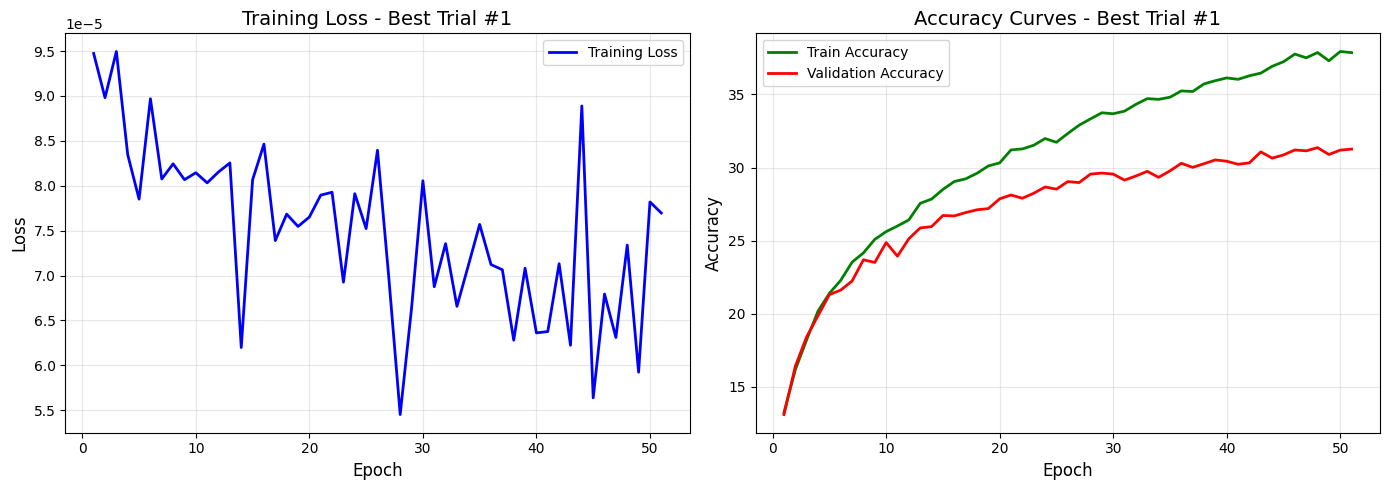

Best Trial #1
Final Train Accuracy: 37.8550
Final Val Accuracy: 31.2600
Best Val Accuracy: 31.3600
Final Loss: 0.0001


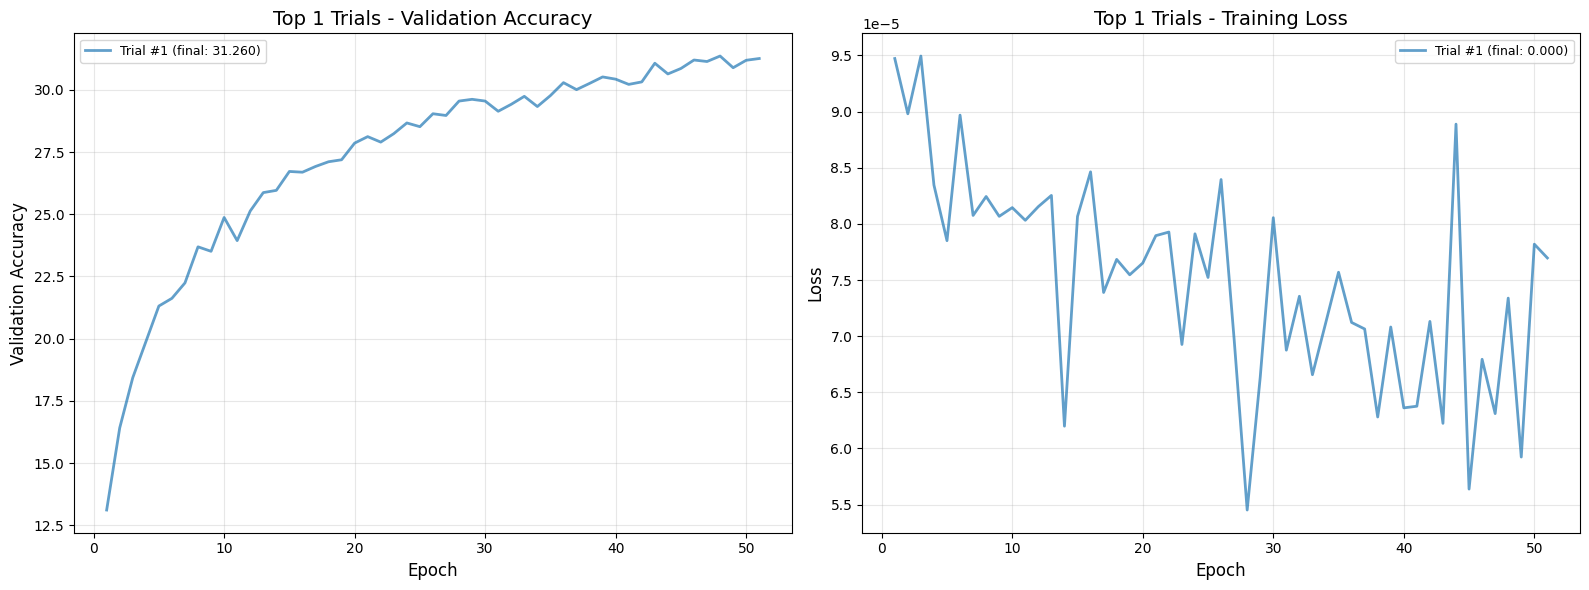

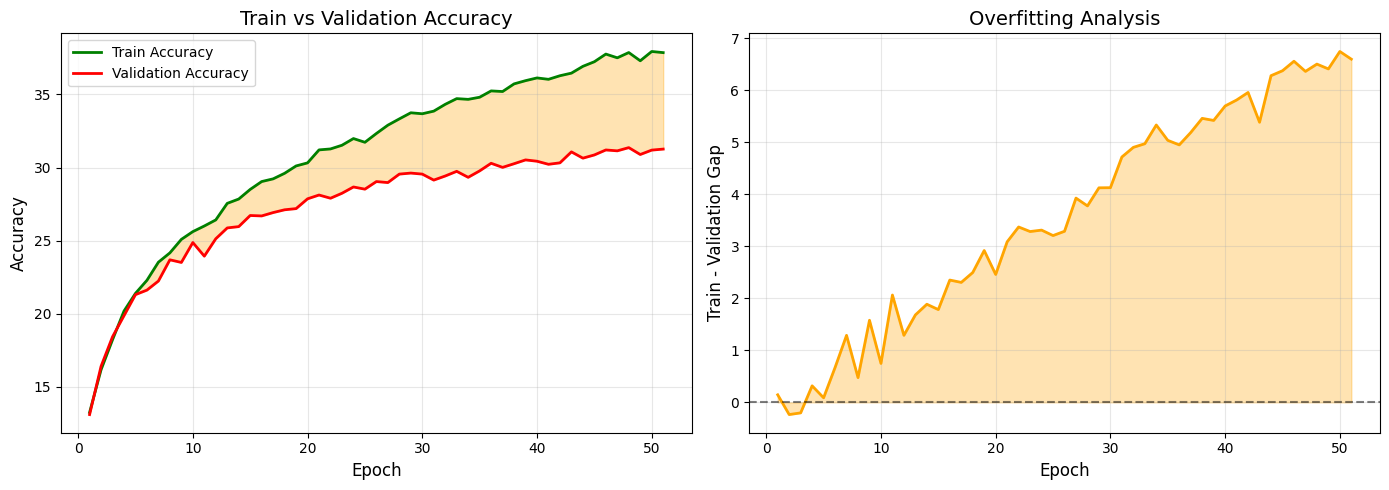

Average Train-Val Gap: 3.5724
Final Train-Val Gap: 6.5950
Max Train-Val Gap: 6.7425


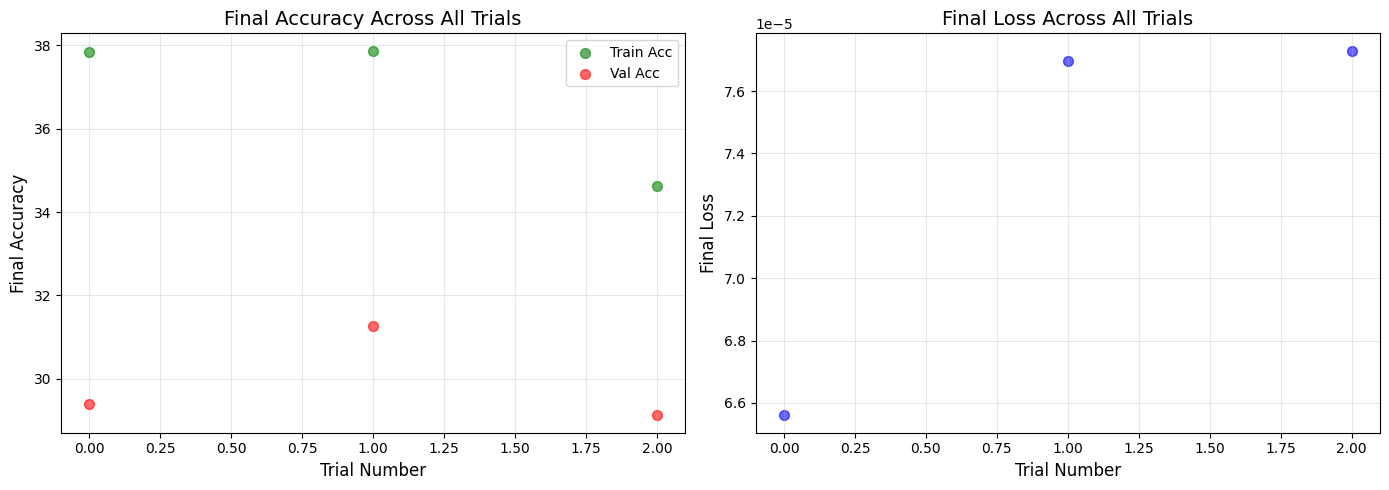

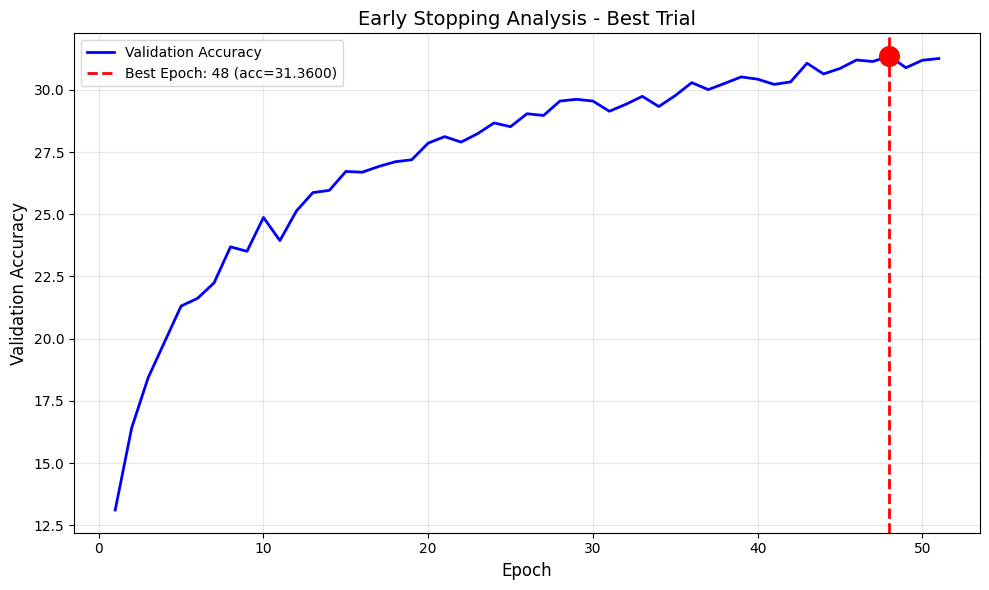

Best epoch would be: 48
Best validation accuracy: 31.3600
Final validation accuracy: 31.2600
Difference: 0.1000


In [67]:
plot_best_trial_learning_curves(study_4Full, path="Results/Mod2FullNet", val_attr="val_accuracies")
plot_multiple_trials_comparison(study_4Full, path="Results/Mod2FullNet", val_attr="val_accuracies", n_trials=1)
plot_overfitting_analysis(study_4Full, path="Results/Mod2FullNet", val_attr="val_accuracies")
plot_all_trials_performance(study_4Full, path="Results/Mod2FullNet", val_attr="val_accuracies")
plot_early_stopping_candidates(study_4Full, path="Results/Mod2FullNet", val_attr="val_accuracies")

In [68]:
# Load the best FourLayerNet model weights from the hyperparameter search on CIFAR-100
four_layer_model_best_cifar100 = FourLayerNet(input_size=3 * 32 * 32, num_classes=100)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the state dict from the best trial on CIFAR-100 validation set
best_cifar100_weights_path_4L = 'Results/Mod2FullNet/best_model_weights.pth'

if os.path.exists(best_cifar100_weights_path_4L):
    four_layer_model_best_cifar100.load_state_dict(torch.load(best_cifar100_weights_path_4L, map_location=device))
    four_layer_model_best_cifar100.to(device)
    four_layer_model_best_cifar100.eval()

    print("Testing the best FourLayerNet model on the CIFAR-100 test set:")
    test_accuracy_cifar100_4L = validate(four_layer_model_best_cifar100, test_loader)

    classes = train_dataset.dataset.classes
    validate_per_class(four_layer_model_best_cifar100, test_loader, classes)
else:
    print(f"Best model weights not found at {best_cifar100_weights_path_4L}")
    print("Please ensure the hyperparameter search for Mod2FullNet was run and saved correctly.")

Testing the best FourLayerNet model on the CIFAR-100 test set:
Accuracy of the network on the test images: 17.38 %
Accuracy of apple : 39.00 %
Accuracy of aquarium_fish : 35.00 %
Accuracy of baby  : 12.00 %
Accuracy of bear  : 5.00 %
Accuracy of beaver : 4.00 %
Accuracy of bed   : 9.00 %
Accuracy of bee   : 10.00 %
Accuracy of beetle : 23.00 %
Accuracy of bicycle : 5.00 %
Accuracy of bottle : 12.00 %
Accuracy of bowl  : 1.00 %
Accuracy of boy   : 2.00 %
Accuracy of bridge : 2.00 %
Accuracy of bus   : 7.00 %
Accuracy of butterfly : 9.00 %
Accuracy of camel : 1.00 %
Accuracy of can   : 1.00 %
Accuracy of castle : 45.00 %
Accuracy of caterpillar : 44.00 %
Accuracy of cattle : 3.00 %
Accuracy of chair : 20.00 %
Accuracy of chimpanzee : 27.00 %
Accuracy of clock : 12.00 %
Accuracy of cloud : 41.00 %
Accuracy of cockroach : 45.00 %
Accuracy of couch : 1.00 %
Accuracy of crab  : 0.00 %
Accuracy of crocodile : 12.00 %
Accuracy of cup   : 34.00 %
Accuracy of dinosaur : 11.00 %
Accuracy of dolph

Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

In [ ]:
#-----------------------DO NOT RUN UNLESS YOU WANT TO TRAIN THE MODEL AGAIN------------------------

best_val_acc = 0.0

def objective_conv(trial):
    global best_val_acc

    # --- 1. Suggest Hyperparameters ---
    n_epochs = trial.suggest_int('n_epochs', 5, 60)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    weight_decay = trial.suggest_float( 'weight_decay', 1e-4, 1e-1, log=True)

    # --- 2. Set up ---
    model = newConvNet()
    model.to(device)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=os.cpu_count())
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=os.cpu_count())

    train_len = len(train_loader.dataset)

  # --- KEY CHANGE: Use AdamW optimizer ---
    optimizer = create_optimizer(model, learning_rate, weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    # Create lists to store the scores from each epoch
    train_accuracies = []
    val_accuracies = []
    epoch_losses = []

    # --- 3. Training and Pruning Loop (Epoch by Epoch) ---
    for epoch in range(n_epochs):
        running_loss = 0.0
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Calculate scores on both test and training sets
        val_acc = validate(model, val_loader)
        train_acc = validate(model, train_loader)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'Results/ModConvNet/best_model_weights.pth')

        # Append scores to their respective lists
        val_accuracies.append(val_acc)
        train_accuracies.append(train_acc)

        running_loss += loss.item()

        epoch_loss = running_loss / train_len
        epoch_losses.append(epoch_loss)

        # Report the TEST accuracy to Optuna for pruning
        trial.report(val_acc, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    # Save the history of scores as a user attribute
    trial.set_user_attr("epoch_losses", epoch_losses)
    trial.set_user_attr("train_accuracies", train_accuracies)
    trial.set_user_attr("test_accuracies", val_accuracies)

    # Optuna's objective function must return the single value to be optimized
    return val_accuracies[-1]


if not os.path.exists('Results/ModConvNet'):
    os.makedirs('Results/ModConvNet')

N_TRIALS = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on: ", device)

# Pruner settings are now more effective as they check after each epoch
study_conv = optuna.create_study(
    direction="maximize",
    pruner=optuna.pruners.MedianPruner(n_startup_trials=3, n_warmup_steps=1, interval_steps=1),
    study_name="Conv Net Modified"
)
# Run the study
study_conv.optimize(objective_conv, n_trials=N_TRIALS)

joblib.dump(study_conv, 'Results/ModConvNet/study_conv_run1.joblib')

In [69]:
study_conv = joblib.load('Results/ModConvNet/study_conv_NoDrop.joblib')

# --- Accessing the results ---
best_trial = study_conv.best_trial

print("\n--- Best Trial Details ---")
print(f"Value (Final Val Acc): {best_trial.value:.2f}%")
print("Best hyperparameters found:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

# Access the saved lists from the best trial's user attributes
bestConv_train_losses = best_trial.user_attrs["epoch_losses"]
bestConv_train_scores = best_trial.user_attrs["train_accuracies"]
bestConv_val_scores = best_trial.user_attrs["test_accuracies"] #they are called test accuracies but are actually val accuracies

print("\nAccuracy History for Best Trial:")
print(f"  Training accuracies: {bestConv_train_scores}")
print(f"  Val accuracies: {bestConv_val_scores}")


--- Best Trial Details ---
Value (Final Val Acc): 37.63%
Best hyperparameters found:
  n_epochs: 60
  learning_rate: 0.00047564717036654134
  batch_size: 64
  weight_decay: 0.009225760287071215

Accuracy History for Best Trial:
  Training accuracies: [10.8075, 14.5975, 16.5475, 18.97, 20.25, 21.7775, 23.2525, 24.3925, 24.5325, 25.63, 26.47, 27.575, 28.345, 28.2625, 29.835, 30.0225, 30.155, 30.0125, 30.96, 31.5525, 31.77, 32.0875, 32.2625, 32.6725, 32.5, 34.0, 34.05, 33.7575, 34.5, 33.7, 34.7325, 34.5525, 34.9, 34.215, 35.8825, 34.4825, 36.1225, 35.6775, 37.04, 36.045, 37.13, 37.14, 37.4625, 36.7875, 37.8225, 37.395, 38.3475, 37.83, 37.075, 38.5575, 38.24, 38.4875, 37.415, 38.3775, 37.475, 38.625, 38.5575, 39.005, 38.9525, 39.855]
  Val accuracies: [10.92, 15.21, 17.37, 19.53, 20.33, 22.64, 23.62, 24.36, 25.32, 25.9, 27.33, 27.76, 28.52, 28.15, 30.14, 29.66, 30.29, 29.54, 30.64, 31.6, 31.55, 32.2, 32.08, 32.34, 32.43, 33.56, 33.19, 33.1, 33.65, 33.04, 33.53, 33.79, 33.88, 33.37, 34.38,

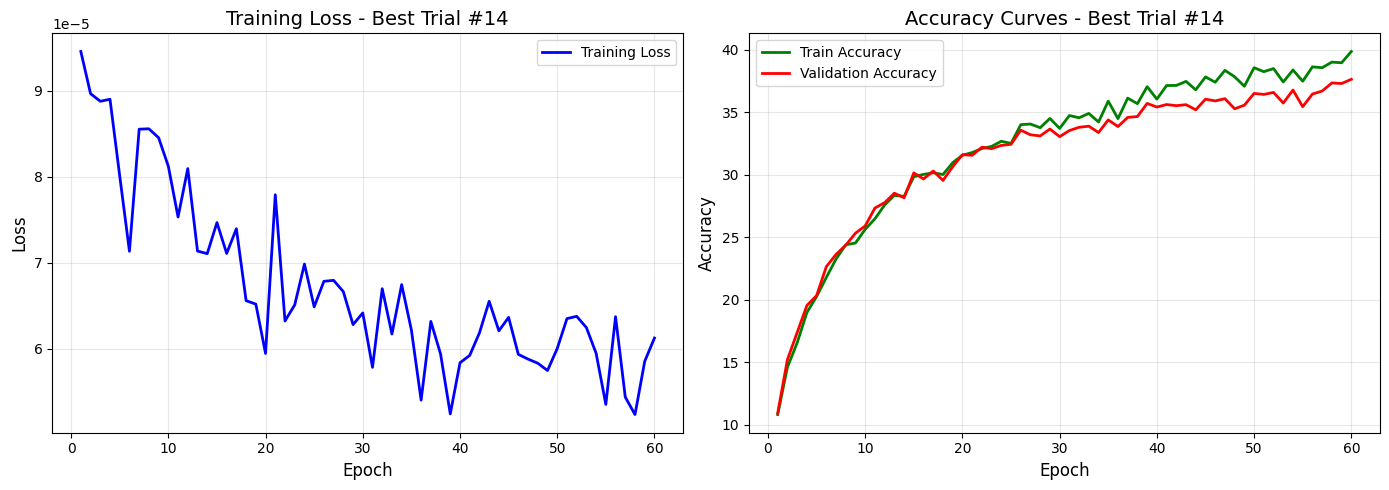

Best Trial #14
Final Train Accuracy: 39.8550
Final Val Accuracy: 37.6300
Best Val Accuracy: 37.6300
Final Loss: 0.0001


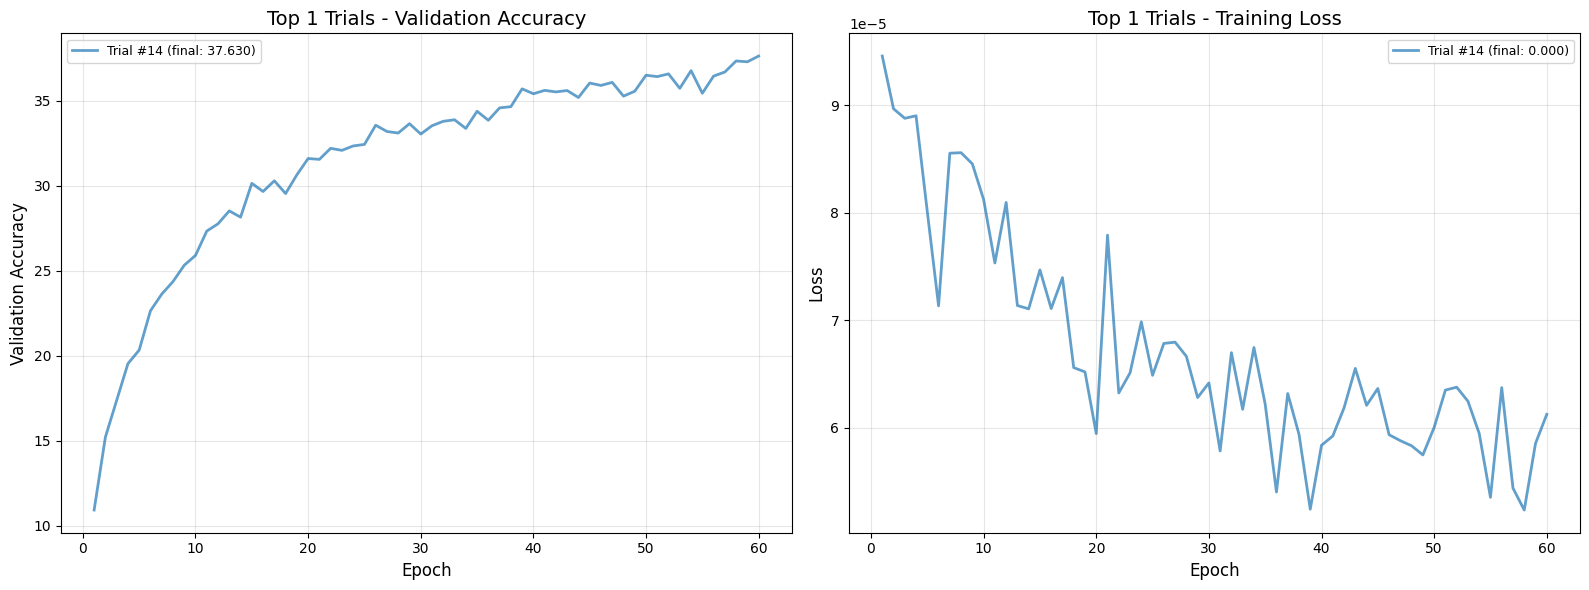

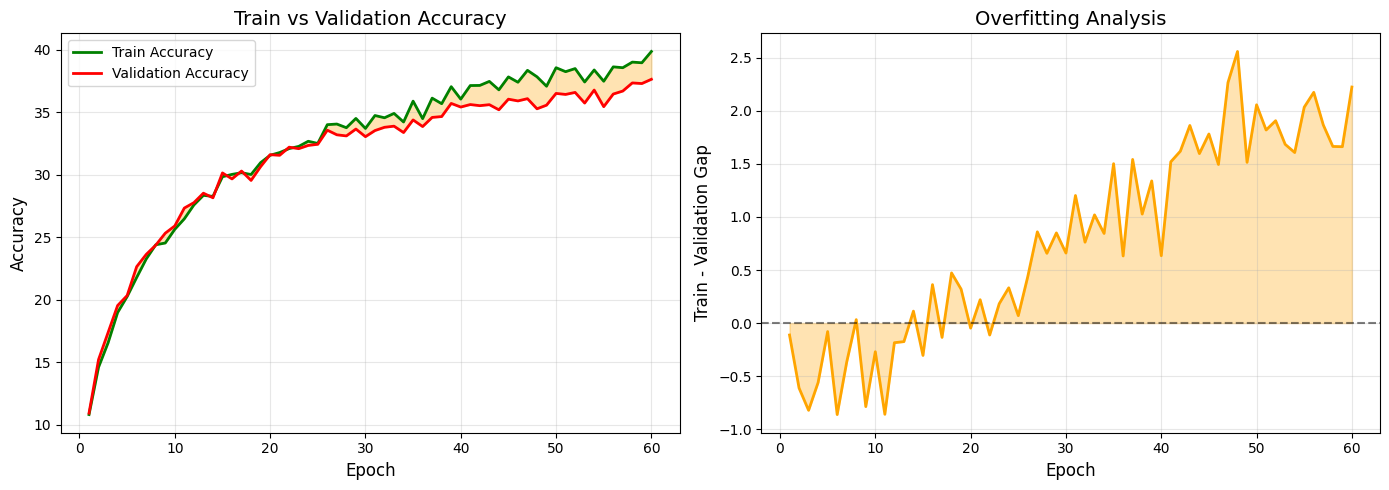

Average Train-Val Gap: 0.7786
Final Train-Val Gap: 2.2250
Max Train-Val Gap: 2.5600


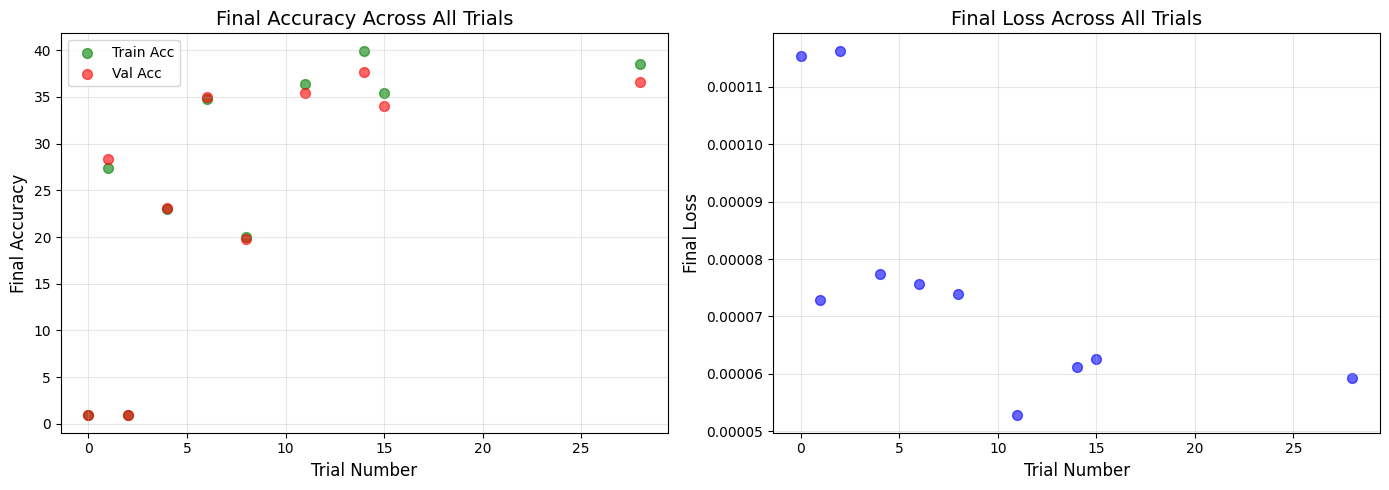

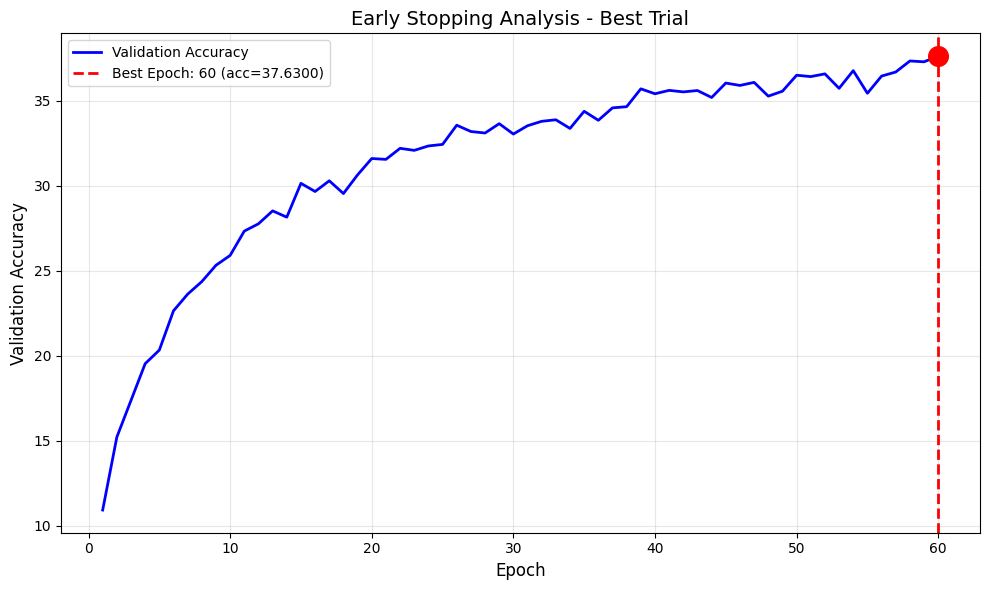

Best epoch would be: 60
Best validation accuracy: 37.6300
Final validation accuracy: 37.6300
Difference: 0.0000


In [70]:
plot_best_trial_learning_curves(study_conv, path="Results/ModConvNet")
plot_multiple_trials_comparison(study_conv, path="Results/ModConvNet", n_trials=1)
plot_overfitting_analysis(study_conv, path="Results/ModConvNet")
plot_all_trials_performance(study_conv, path="Results/ModConvNet")
plot_early_stopping_candidates(study_conv, path="Results/ModConvNet")

In [71]:
# Load the best ConvNet model weights from the hyperparameter search on CIFAR-100
conv_model_best_cifar100 = newConvNet(num_classes=100) # Initialize with 100 classes for CIFAR-100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the state dict from the best trial on CIFAR-100 validation set
study_conv = joblib.load('Results/ModConvNet/study_conv_NoDrop.joblib')
best_cifar100_weights_path = 'Results/ModConvNet/best_modelNoDrop_weights.pth'

if os.path.exists(best_cifar100_weights_path):
    conv_model_best_cifar100.load_state_dict(torch.load(best_cifar100_weights_path, map_location=device))
    conv_model_best_cifar100.to(device)
    conv_model_best_cifar100.eval()

    print("Testing the best ConvNet model on the CIFAR-100 test set:")
    test_accuracy_cifar100 = validate(conv_model_best_cifar100, test_loader)

    classes = train_dataset.dataset.classes
    validate_per_class(conv_model_best_cifar100, test_loader, classes)
else:
    print(f"Best model weights not found at {best_cifar100_weights_path}")
    print("Please ensure the hyperparameter search for ModConvNet was run and saved correctly.")

Testing the best ConvNet model on the CIFAR-100 test set:
Accuracy of the network on the test images: 38.48 %
Accuracy of apple : 72.00 %
Accuracy of aquarium_fish : 49.00 %
Accuracy of baby  : 31.00 %
Accuracy of bear  : 15.00 %
Accuracy of beaver : 12.00 %
Accuracy of bed   : 26.00 %
Accuracy of bee   : 46.00 %
Accuracy of beetle : 35.00 %
Accuracy of bicycle : 50.00 %
Accuracy of bottle : 53.00 %
Accuracy of bowl  : 10.00 %
Accuracy of boy   : 16.00 %
Accuracy of bridge : 43.00 %
Accuracy of bus   : 34.00 %
Accuracy of butterfly : 29.00 %
Accuracy of camel : 35.00 %
Accuracy of can   : 33.00 %
Accuracy of castle : 60.00 %
Accuracy of caterpillar : 36.00 %
Accuracy of cattle : 21.00 %
Accuracy of chair : 70.00 %
Accuracy of chimpanzee : 59.00 %
Accuracy of clock : 35.00 %
Accuracy of cloud : 59.00 %
Accuracy of cockroach : 55.00 %
Accuracy of couch : 26.00 %
Accuracy of crab  : 29.00 %
Accuracy of crocodile : 24.00 %
Accuracy of cup   : 61.00 %
Accuracy of dinosaur : 26.00 %
Accuracy

<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [72]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''

    transform = transforms.Compose([transforms.ToTensor()])

    stl_dataset = torchvision.datasets.STL10(root='./data', split='train', download=True, transform=transform)

    images_per_class = {cls_name: [] for cls_name in class_mapping.values()}

    for img, label in stl_dataset:
        if label in class_mapping:
            cls_name = class_mapping[label]
            if len(images_per_class[cls_name]) < 5:
                images_per_class[cls_name].append(img)
        # Stop if we have 5 images for all classes
        if all(len(images) == 5 for images in images_per_class.values()):
            break

    fig, axes = plt.subplots(len(class_mapping), 5, figsize=(15, 10))
    for row, cls_name in enumerate(class_mapping.values()):
        for col in range(5):
            img = images_per_class[cls_name][col]
            np_img = img.permute(1, 2, 0).numpy()
            axes[row, col].imshow(np_img)
            axes[row, col].axis('off')
            if col == 2:
                axes[row, col].set_title(cls_name, fontsize=12)
    plt.tight_layout()
    plt.show()

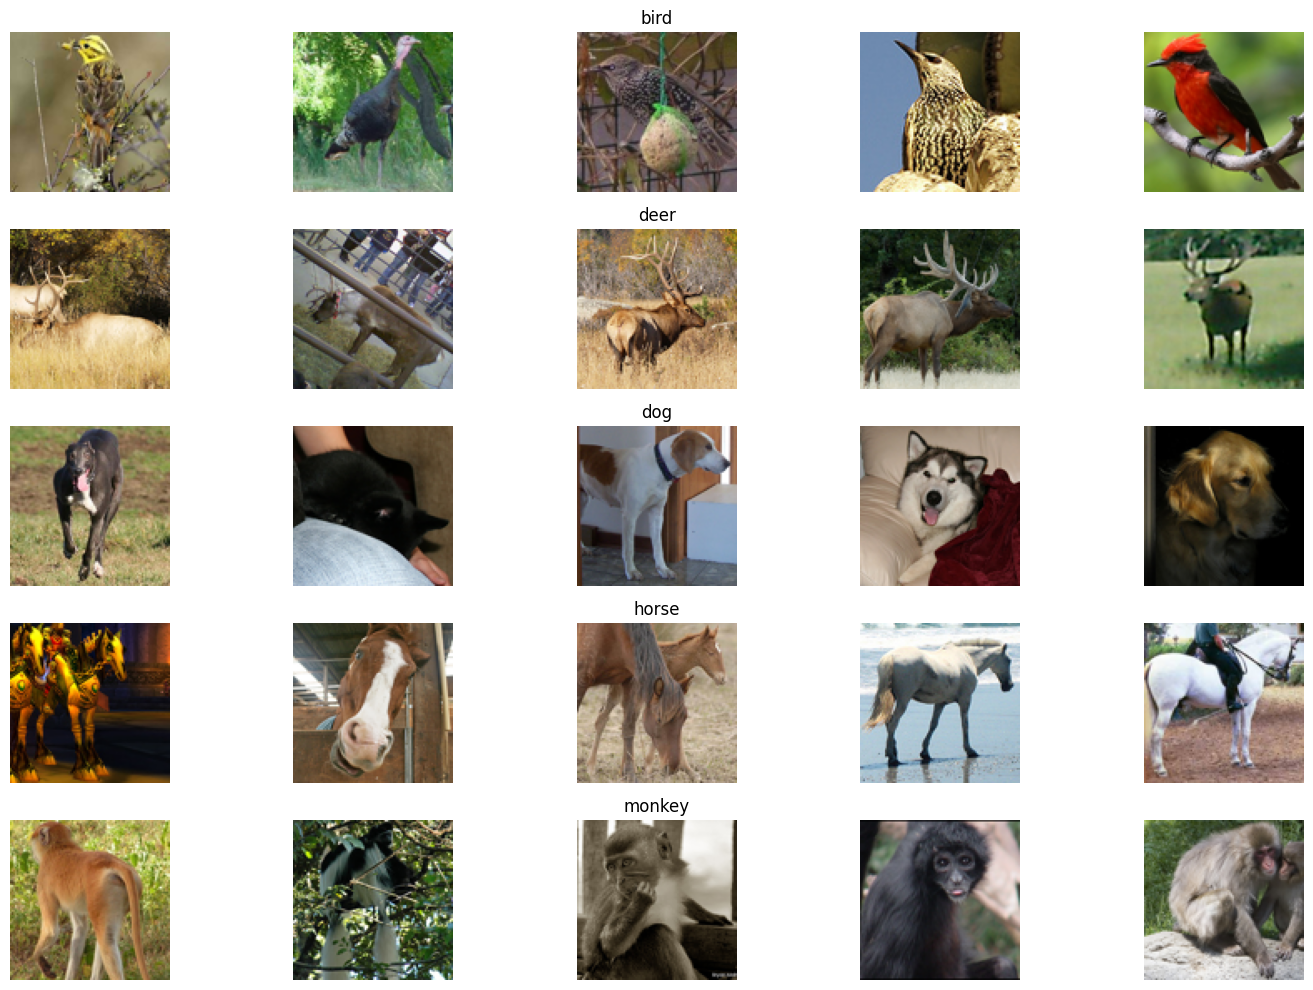

In [73]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [74]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''

        split = 'train' if train else 'test'
        self.transform = transform

        target_classes = [1, 4, 5, 6, 7]  # bird, deer, dog, horse, monkey
        label_conversion = {1: 0, 4: 1, 5: 2, 6: 3, 7: 4}

        full_dataset = torchvision.datasets.STL10(root=root, split=split, download=True)

        self.data = []
        self.labels = []
        for img, label in full_dataset:
            if label in target_classes:
                self.data.append(img)
                self.labels.append(label_conversion[label])


    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''

        return len(self.data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''

        img, label = self.data[idx], self.labels[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

# --- Example of how to use the STL10_loader ---

# Define the image transformations
transform_train_STL = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Resize((32, 32), antialias=True), # Resize to match ConvNet input
    transforms.Normalize(mean=[0.4467, 0.4398, 0.4066], std=[0.2603, 0.2566, 0.2713]),
])


transform_test_STL = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32, 32), antialias=True), # Resize to match ConvNet input
    transforms.Normalize(mean=[0.4467, 0.4398, 0.4066], std=[0.2603, 0.2566, 0.2713]),
])

train_STL_dataset = STL10_loader(root='./data', train=True, transform=transform_train_STL)
val_STL_dataset = STL10_loader(root='./data', train=True, transform=transform_test_STL)
test_STL_dataset = STL10_loader(root='./data', train=False, transform=transform_test_STL)

SEED = 42
total_train_STL_len = len(train_STL_dataset)
val_STL_len = int(total_train_STL_len * 0.25)
new_train_STL_len = total_train_STL_len - val_STL_len

STL10_labels = train_STL_dataset.labels
STL_indices = list(range(len(STL10_labels)))

train_STL_indices, val_STL_indices = train_test_split(
    STL_indices, # Use STL_indices instead of indices
    test_size=val_STL_len,
    stratify=STL10_labels,
    random_state=SEED
)

train_STL_subset = Subset(train_STL_dataset, train_STL_indices)
val_STL_subset = Subset(val_STL_dataset, val_STL_indices)

batch_size = 64

STL_train_loader = DataLoader(train_STL_subset, batch_size=batch_size, shuffle=True, num_workers=os.cpu_count())
STL_val_loader = DataLoader(val_STL_subset, batch_size=batch_size, shuffle=False, num_workers=os.cpu_count())
STL_test_loader = DataLoader(test_STL_dataset, batch_size=batch_size, shuffle=False, num_workers=os.cpu_count())

print(f"Using {len(train_STL_subset)} images for training (with augmentation)")
print(f"Using {len(val_STL_subset)} images for validation (no augmentation)")
print(f"Using {len(test_STL_dataset)} images for testing (no augmentation)")

Using 1875 images for training (with augmentation)
Using 625 images for validation (no augmentation)
Using 4000 images for testing (no augmentation)


<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [75]:
if not os.path.exists('Results/STLConvNet'):
    os.makedirs('Results/STLConvNet')

# Load the best ConvNet hyperparameters
study_conv = joblib.load('Results/ModConvNet/study_conv_NoDrop.joblib')
conv_params = study_conv.best_trial.params

# Load the pre-trained ConvNet (trained on CIFAR-100)
# Initialize with 100 classes first to load the state dict
conv_model_STL = newConvNet(num_classes=100)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
conv_model_STL.load_state_dict(torch.load('Results/ModConvNet/best_modelNoDrop_weights.pth', map_location=device))

#Get out_features from the Linear layer before the ReLU
num_ftrs = conv_model_STL.fc_layers[3].out_features

# First, set all parameters in the model to be non-trainable
for param in conv_model_STL.parameters():
    param.requires_grad = False

# Replace the final layer
conv_model_STL.fc_layers[-1] = nn.Linear(in_features=64, out_features=5)

# Move model to the device
conv_model_STL.to(device)

# Define the optimizer for the trainable parameters
trainable_params = [p for p in conv_model_STL.parameters() if p.requires_grad]
optimizer = torch.optim.AdamW(trainable_params, lr=conv_params['learning_rate'], weight_decay=conv_params['weight_decay'])
print("Trainable params:", [(n, tuple(p.shape)) for n, p in conv_model_STL.named_parameters() if p.requires_grad])

Trainable params: [('fc_layers.5.weight', (5, 64)), ('fc_layers.5.bias', (5,))]


In [ ]:
#-----------------------HYPERPAR SEARCH FOR TRANSFER LEARNING MODEL------------------------

best_val_acc = 0.0

def objective_conv(trial):
    global best_val_acc

    # --- 1. Suggest Hyperparameters ---
    n_epochs = trial.suggest_int('n_epochs', 5, 60)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    weight_decay = trial.suggest_float( 'weight_decay', 1e-4, 1e-1, log=True)

    # --- 2. Set up ---
    model = conv_model_STL
    model.to(device)

    STL_train_loader = DataLoader(train_STL_subset, batch_size=batch_size, shuffle=True, num_workers=os.cpu_count())
    STL_val_loader = DataLoader(val_STL_subset, batch_size=batch_size, shuffle=False, num_workers=os.cpu_count())

    train_len = len(STL_train_loader.dataset)

  # --- KEY CHANGE: Use AdamW optimizer ---
    optimizer = create_optimizer(model, learning_rate, weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    # Create lists to store the scores from each epoch
    train_accuracies = []
    val_accuracies = []
    epoch_losses = []

    # --- 3. Training and Pruning Loop (Epoch by Epoch) ---
    for epoch in range(n_epochs):
        running_loss = 0.0
        model.train()
        for images, labels in STL_train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Calculate scores on both test and training sets
        val_acc = validate(model, STL_val_loader)
        train_acc = validate(model, STL_train_loader)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'Results/STLConvNet/best_modelNoDrop_weights_hyperSearch.pth')

        # Append scores to their respective lists
        val_accuracies.append(val_acc)
        train_accuracies.append(train_acc)

        running_loss += loss.item()

        epoch_loss = running_loss / train_len
        epoch_losses.append(epoch_loss)

        # Report the TEST accuracy to Optuna for pruning
        trial.report(val_acc, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    # Save the history of scores as a user attribute
    trial.set_user_attr("epoch_losses", epoch_losses)
    trial.set_user_attr("train_accuracies", train_accuracies)
    trial.set_user_attr("test_accuracies", val_accuracies)

    # Optuna's objective function must return the single value to be optimized
    return val_accuracies[-1]

N_TRIALS = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Running on: ", device)

# Pruner settings are now more effective as they check after each epoch
study_conv = optuna.create_study(
    direction="maximize",
    pruner=optuna.pruners.MedianPruner(n_startup_trials=3, n_warmup_steps=1, interval_steps=1),
    study_name="Conv Net Modified"
)
# Run the study
study_conv.optimize(objective_conv, n_trials=N_TRIALS)

joblib.dump(study_conv, 'Results/STLConvNet/study_convNoDrop_hyperSearch.joblib')

In [76]:
study_STLconv = joblib.load('Results/STLConvNet/study_convNoDrop_hyperSearch.joblib')

# --- Accessing the results ---
best_trial = study_STLconv.best_trial

print("\n--- Best Trial Details ---")
print(f"Value (Final Val Acc): {best_trial.value:.2f}%")
print("Best hyperparameters found:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

# Access the saved lists from the best trial's user attributes
bestConv_train_losses = best_trial.user_attrs["epoch_losses"]
bestConv_train_scores = best_trial.user_attrs["train_accuracies"]
bestConv_val_scores = best_trial.user_attrs["test_accuracies"] #they are called test accuracies but are actually val accuracies

print("\nAccuracy History for Best Trial:")
print(f"  Training accuracies: {bestConv_train_scores}")
print(f"  Val accuracies: {bestConv_val_scores}")


--- Best Trial Details ---
Value (Final Val Acc): 43.04%
Best hyperparameters found:
  n_epochs: 48
  learning_rate: 0.0006714253050220775
  batch_size: 64
  weight_decay: 0.00010701423779141585

Accuracy History for Best Trial:
  Training accuracies: [36.693333333333335, 39.093333333333334, 37.81333333333333, 37.70666666666666, 38.56, 39.04, 38.13333333333333, 37.92, 39.14666666666667, 39.25333333333333, 36.586666666666666, 39.57333333333333, 37.81333333333333, 37.653333333333336, 38.24, 38.026666666666664, 37.28, 38.82666666666667, 38.50666666666667, 36.85333333333333, 37.92, 38.61333333333334, 38.346666666666664, 37.44, 37.92, 37.70666666666666, 37.6, 37.92, 40.32, 37.973333333333336, 38.93333333333333, 39.093333333333334, 37.333333333333336, 37.49333333333333, 38.82666666666667, 38.72, 39.14666666666667, 39.2, 38.72, 38.77333333333333, 38.24, 38.13333333333333, 37.22666666666667, 39.36, 37.12, 39.626666666666665, 37.92, 39.2]
  Val accuracies: [42.88, 40.48, 41.92, 41.28, 41.12, 4

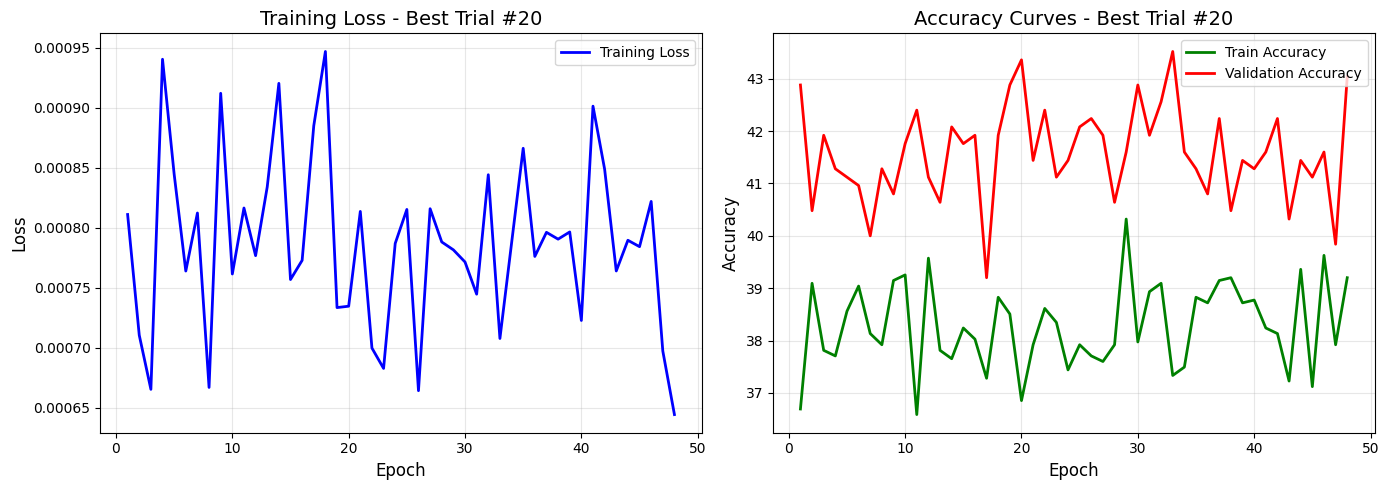

Best Trial #20
Final Train Accuracy: 39.2000
Final Val Accuracy: 43.0400
Best Val Accuracy: 43.5200
Final Loss: 0.0006


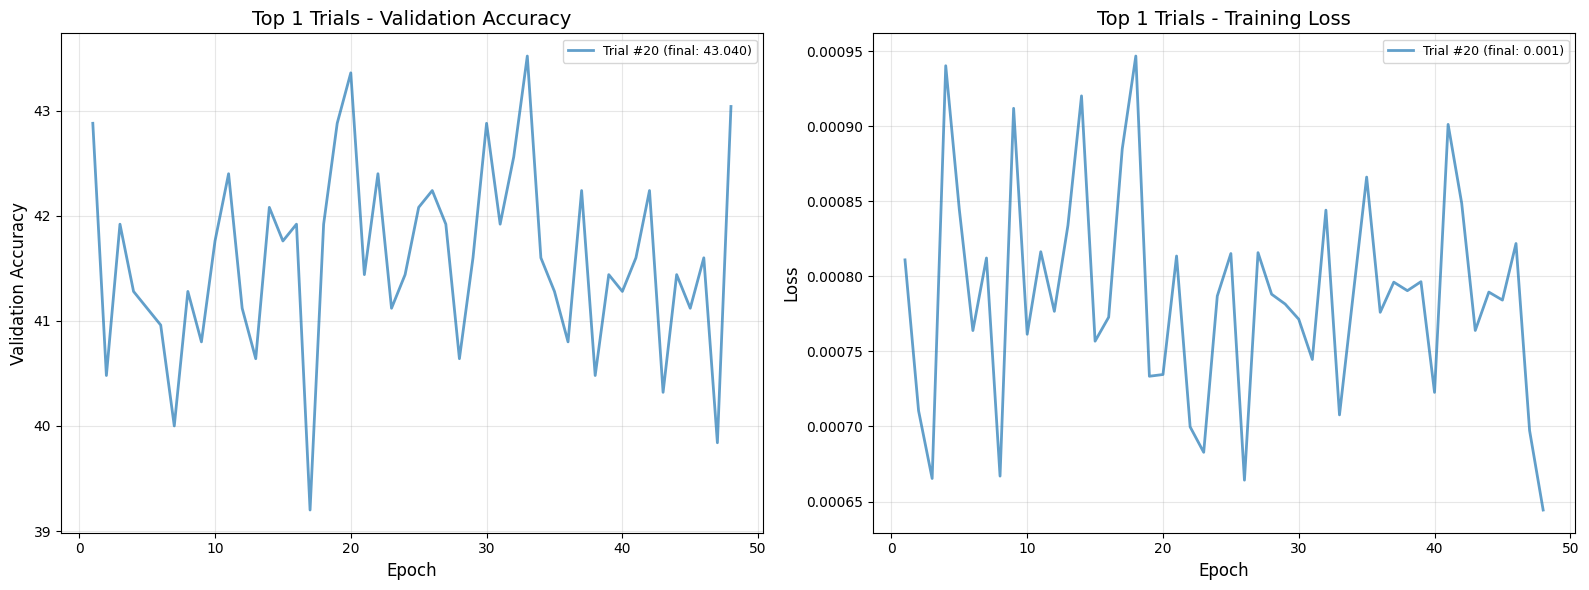

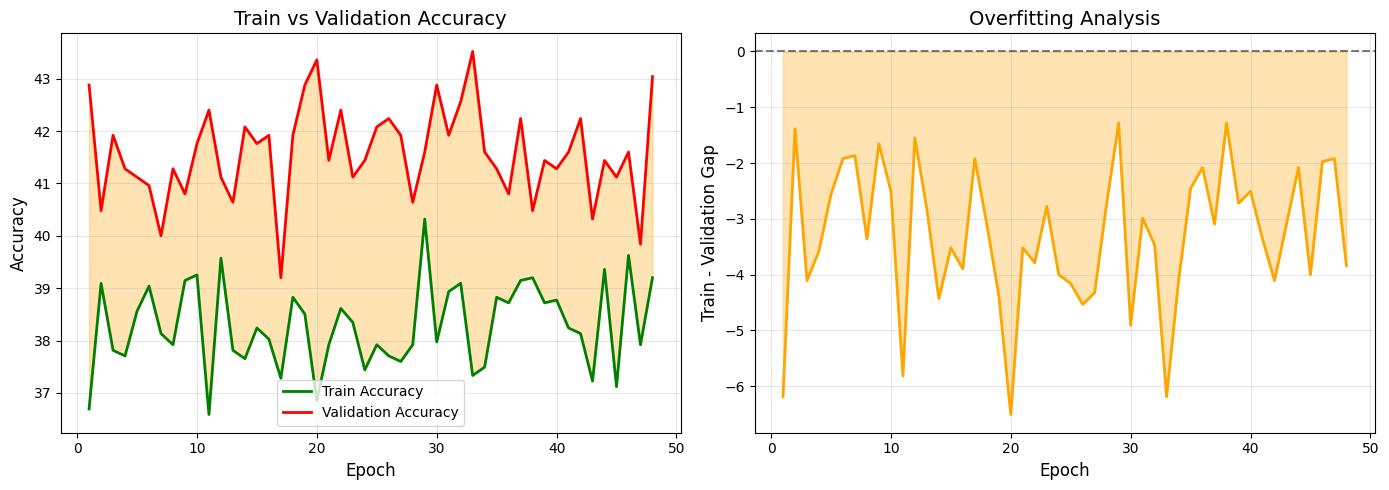

Average Train-Val Gap: -3.2978
Final Train-Val Gap: -3.8400
Max Train-Val Gap: -1.2800


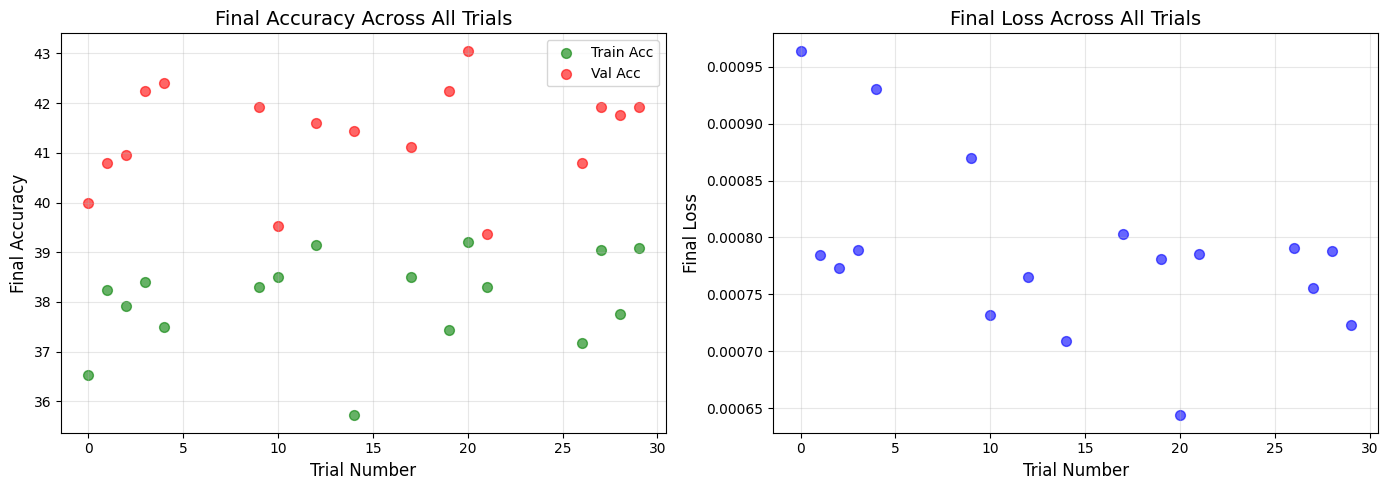

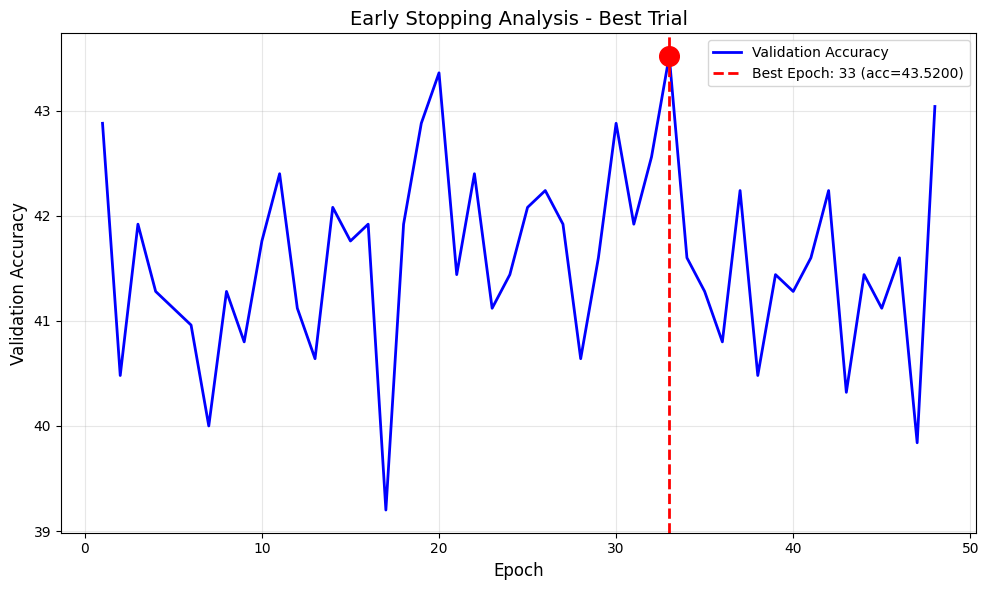

Best epoch would be: 33
Best validation accuracy: 43.5200
Final validation accuracy: 43.0400
Difference: 0.4800


In [77]:
study_STLconv = joblib.load('Results/STLConvNet/study_convNoDrop_hyperSearch.joblib')

plot_best_trial_learning_curves(study_STLconv, path="Results/STLConvNet")
plot_multiple_trials_comparison(study_STLconv, path="Results/STLConvNet", n_trials=1)
plot_overfitting_analysis(study_STLconv, path="Results/STLConvNet")
plot_all_trials_performance(study_STLconv, path="Results/STLConvNet")
plot_early_stopping_candidates(study_STLconv, path="Results/STLConvNet")

In [78]:
# Load the best model weights
conv_model_STL = newConvNet(num_classes=5) # Initialize with 5 classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
conv_model_STL.load_state_dict(torch.load('Results/STLConvNet/best_modelNoDrop_weights_hyperSearch.pth', map_location=device))
conv_model_STL.to(device)
conv_model_STL.eval()

# Test the model
test_accuracy = validate(conv_model_STL, STL_test_loader)

# Define the class names for STL-10 subset
stl10_classes = ['bird', 'deer', 'dog', 'horse', 'monkey']
validate_per_class(conv_model_STL, STL_test_loader, stl10_classes)

Accuracy of the network on the test images: 45.27 %
Accuracy of bird  : 44.75 %
Accuracy of deer  : 51.00 %
Accuracy of dog   : 22.38 %
Accuracy of horse : 55.38 %
Accuracy of monkey : 52.88 %


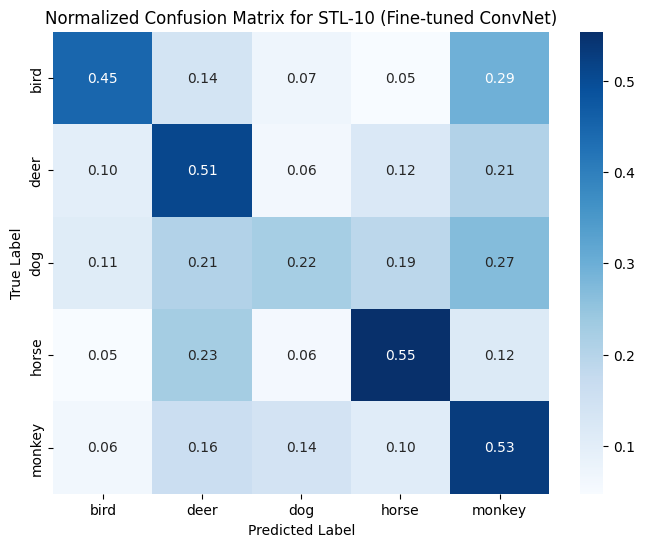

In [79]:
# Get predictions and true labels
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in STL_test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = conv_model_STL(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Normalize confusion matrix to show proportions
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=stl10_classes, yticklabels=stl10_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for STL-10 (Fine-tuned ConvNet)')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



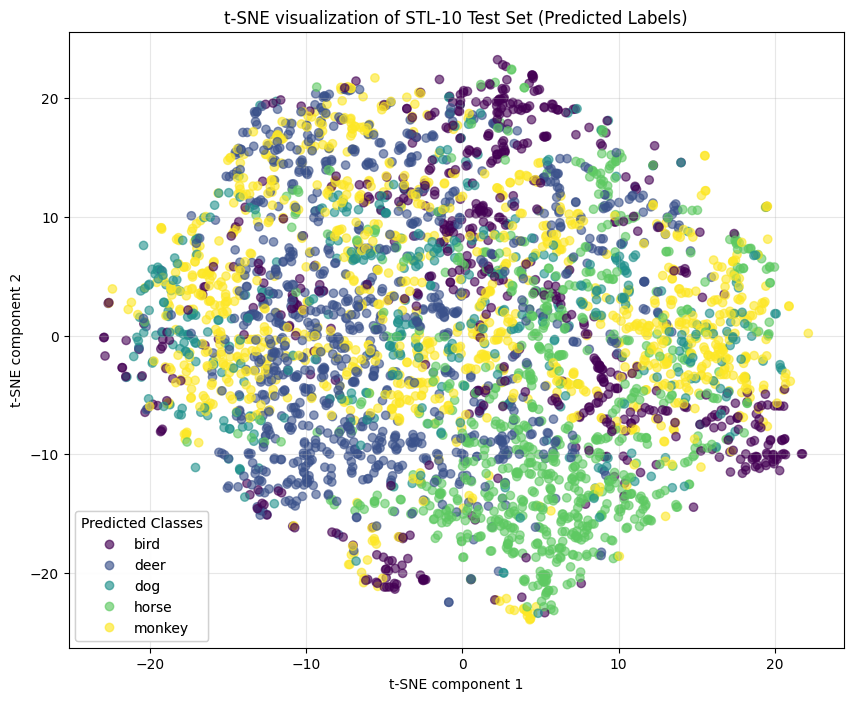

In [80]:
# Ensure the model is on the correct device and in evaluation mode
conv_model_STL.to(device)
conv_model_STL.eval()

# Extract features and get predictions
features = []
predicted_labels = []
true_labels = [] # Also get true labels for comparison if needed later

# Define a hook to capture features from a specific layer
# We will capture features from the layer before the final classification layer
# Looking at the newConvNet definition, the layer before the last Linear layer is the one with 64 out_features
feature_layer = conv_model_STL.fc_layers[4] # This is the Linear layer with 64 out_features

def hook_fn(module, input, output):
    # The output is the feature tensor
    features.append(output.cpu().numpy())

# Register the hook
hook = feature_layer.register_forward_hook(hook_fn)

with torch.no_grad():
    for inputs, labels in STL_test_loader:
        inputs = inputs.to(device)
        outputs = conv_model_STL(inputs)
        _, predicted = torch.max(outputs, 1)

        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy()) # Keep true labels as well


# Remove the hook
hook.remove()

# Concatenate features from all batches
features = np.concatenate(features, axis=0)

# Apply t-SNE
# You might need to adjust perplexity and n_iter based on your dataset size and complexity
tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, n_iter=300)
features_tsne = tsne.fit_transform(features)

# Define the class names for STL-10 subset
stl10_classes = ['bird', 'deer', 'dog', 'horse', 'monkey']

# Create the t-SNE plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=predicted_labels, cmap='viridis', alpha=0.6)

# Add legend with class names
legend1 = plt.legend(*scatter.legend_elements(), loc="lower left", title="Predicted Classes")
plt.gca().add_artist(legend1)

# Update legend labels with actual class names
for i, text in enumerate(legend1.get_texts()):
    text.set_text(stl10_classes[int(text.get_text().split('}')[0].split('{')[1])])


plt.title('t-SNE visualization of STL-10 Test Set (Predicted Labels)')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.grid(True, alpha=0.3)
plt.show()

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [ ]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
| David Van Batenburg | 25% | 25% | 25% |
| Samuele Punzo | 25% | 25% | 25% |
| Edoardo Vergnano | 25% | 25% | 25% |
| Seyedeh Zahra Ahmadi | 25% | 25% | 25% |

### - End of Notebook -